In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [13]:
df=pd.read_excel('/content/drive/MyDrive/DA - Internship/predictions/Main Dataframe With RFM Score.xlsx')
df.rename(columns = {'age':'Age'}, inplace = True)
df.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,Age,state,property_valuation,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,RFM_Score
0,Male,19.0,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,68.0,VIC,6.0,...,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87,0.1
1,Female,89.0,Clinical Specialist,Health,Mass Customer,Yes,10.0,44.0,NSW,5.0,...,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55,0.7
2,Male,9.0,Desktop Support Technician,Retail,Affluent Customer,No,22.0,46.0,NSW,1.0,...,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61,0.6
3,Male,83.0,Staff Scientist,Financial Services,Mass Customer,No,16.0,61.0,NSW,10.0,...,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36,0.5
4,Male,3.0,Web Designer II,Property,Affluent Customer,Yes,16.0,64.0,NSW,10.0,...,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,2006-11-10,709.34,0.9


In [14]:
#Creating a function to categorize the customers' loyalty score based on the RFM score

def CustomerValue(x):
  data=df['RFM_Score ']
  if x<=np.percentile(data,25):
    return 'Bronze'
  if x<=np.percentile(data,50):
    return 'Silver'
  if x<=np.percentile(data,75):
    return 'Gold'
  if x<=np.percentile(data, 75):
    return 'Platinum'
  else:
    return 'Diamond'

In [15]:
# List of values to drop based on the 'Name' column
values_to_drop = ['Administrative Assistant III', 'Administrative Assistant IV', 'Biostatistician I', 'Biostatistician II', 'Biostatistician III','Safety Technician III', 'Web Developer III', 'Office Assistant III', 'Web Designer III', 'Software Engineer IV', 'Geologist II']

# Drop rows where 'Name' column matches values in the 'values_to_drop' list
df = df[~df['job_title'].isin(values_to_drop)]

In [16]:
df['Loyalty Category']=[ CustomerValue(i) for i in df['RFM_Score ']]
df.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,Age,state,property_valuation,...,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,RFM_Score,Loyalty Category
0,Male,19.0,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,68.0,VIC,6.0,...,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87,0.1,Diamond
1,Female,89.0,Clinical Specialist,Health,Mass Customer,Yes,10.0,44.0,NSW,5.0,...,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55,0.7,Diamond
2,Male,9.0,Desktop Support Technician,Retail,Affluent Customer,No,22.0,46.0,NSW,1.0,...,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61,0.6,Diamond
3,Male,83.0,Staff Scientist,Financial Services,Mass Customer,No,16.0,61.0,NSW,10.0,...,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36,0.5,Diamond
4,Male,3.0,Web Designer II,Property,Affluent Customer,Yes,16.0,64.0,NSW,10.0,...,Giant Bicycles,Road,medium,medium,1538.99,829.65,2006-11-10,709.34,0.9,Diamond


In [17]:
df.columns

Index(['gender', 'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'Age',
       'state', 'property_valuation', 'transaction_date', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'RFM_Score ', 'Loyalty Category'],
      dtype='object')

In [18]:
cols=['gender','job_title','job_industry_category','wealth_segment','owns_car','state']
df1=df.drop(['transaction_date','order_status','product_first_sold_date','online_order','order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit'],axis='columns')
df1.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,Age,state,property_valuation,RFM_Score,Loyalty Category
0,Male,19.0,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,68.0,VIC,6.0,0.1,Diamond
1,Female,89.0,Clinical Specialist,Health,Mass Customer,Yes,10.0,44.0,NSW,5.0,0.7,Diamond
2,Male,9.0,Desktop Support Technician,Retail,Affluent Customer,No,22.0,46.0,NSW,1.0,0.6,Diamond
3,Male,83.0,Staff Scientist,Financial Services,Mass Customer,No,16.0,61.0,NSW,10.0,0.5,Diamond
4,Male,3.0,Web Designer II,Property,Affluent Customer,Yes,16.0,64.0,NSW,10.0,0.9,Diamond


In [19]:
df.columns

Index(['gender', 'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'Age',
       'state', 'property_valuation', 'transaction_date', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'RFM_Score ', 'Loyalty Category'],
      dtype='object')

In [20]:
df1.drop(columns=["RFM_Score ", 'Loyalty Category'], axis =1, inplace= True)
X=df1.copy()
X=pd.get_dummies(df1,columns=cols)
y = df["Loyalty Category"]

# Split the training data into a training set and a validation set
X_train, X_val, y_train, y_val = tts(X, y, test_size=0.2, random_state=30)

In [21]:
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)

In [22]:
clf = RandomForestClassifier(n_estimators=200, random_state=30)
clf.fit(X_train.values, y_train)

ValueError: ignored

In [23]:
# Model Evaluation
y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

NotFittedError: ignored

In [ ]:
uploaded=files.upload()

Saving Test.xlsx to Test (5).xlsx


In [ ]:
test_df=pd.read_excel('Test.xlsx', sheet_name= 'NewCustomerList')
test_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,Age,job_title,job_industry_category,wealth_segment,owns_car,tenure,state,country,property_valuation,Value
0,Chickie,Brister,Male,86,66,General Manager,Manufacturing,Mass Customer,Yes,14,QLD,Australia,6,1.718750
1,Morly,Genery,Male,69,53,Structural Engineer,Property,Mass Customer,No,16,NSW,Australia,11,1.718750
2,Ardelis,Forrester,Female,10,49,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,VIC,Australia,5,1.718750
3,Lucine,Stutt,Female,64,44,Account Representative III,Manufacturing,Affluent Customer,Yes,5,QLD,Australia,1,1.703125
4,Melinda,Hadlee,Female,34,58,Financial Analyst,Financial Services,Affluent Customer,No,19,NSW,Australia,9,1.703125


gender, past 3, age, job title, job industry, wealth segment, owns car, tenure, state, country, prop valuation.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler for 'Value'
value_scaler = MinMaxScaler()
norm_value = value_scaler.fit_transform(test_df['Value'].values.reshape(-1, 1))

In [ ]:
X_test.columns

Index(['gender', 'past_3_years_bike_related_purchases', 'Age', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'state', 'property_valuation'],
      dtype='object')

In [ ]:
# Prediction on the test data
Y_test=norm_value
X_test = test_df.drop(columns=['first_name','last_name','Value','country'])  # Adjust this based on your preprocessing


# Scale the test data
cols=['gender','job_title','job_industry_category','wealth_segment','owns_car','state']
X_test_scaled=pd.get_dummies(X_test,columns=cols)
#X_test_scaled = scaler.transform(X_test_scaled)



In [ ]:
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (10896, 218)
Shape of X_test_scaled: (1000, 207)


In [ ]:
# Make predictions
test_predictions = clf.predict(X_test_scaled.values)

In [ ]:
test_predictions=test_predictions.tolist()

In [ ]:
test_df['Predicted Loyalty']=test_predictions

In [ ]:
test_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,Age,job_title,job_industry_category,wealth_segment,owns_car,tenure,state,country,property_valuation,Value,Predicted Loyalty
0,Chickie,Brister,Male,86,66,General Manager,Manufacturing,Mass Customer,Yes,14,QLD,Australia,6,1.718750,Bronze
1,Morly,Genery,Male,69,53,Structural Engineer,Property,Mass Customer,No,16,NSW,Australia,11,1.718750,Bronze
2,Ardelis,Forrester,Female,10,49,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,VIC,Australia,5,1.718750,Bronze
3,Lucine,Stutt,Female,64,44,Account Representative III,Manufacturing,Affluent Customer,Yes,5,QLD,Australia,1,1.703125,Bronze
4,Melinda,Hadlee,Female,34,58,Financial Analyst,Financial Services,Affluent Customer,No,19,NSW,Australia,9,1.703125,Bronze


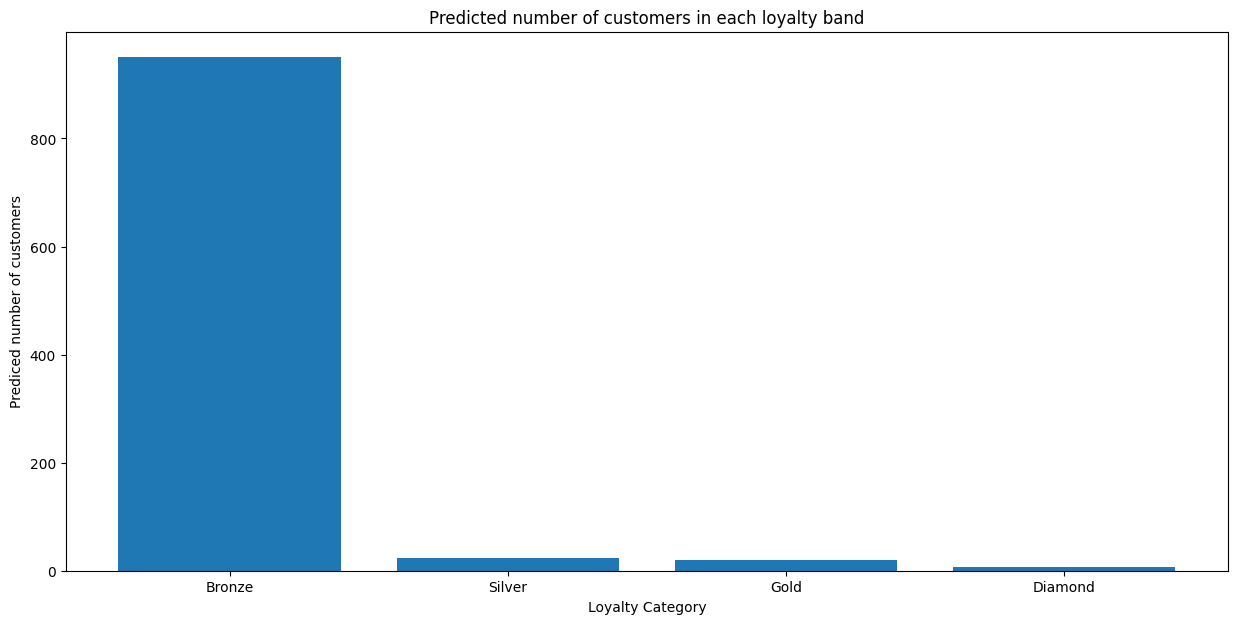

In [ ]:
x=test_df['Predicted Loyalty'].unique()
y=test_df['Predicted Loyalty'].value_counts().values

import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.bar(x,y)
plt.title('Predicted number of customers in each loyalty band')
plt.xlabel('Loyalty Category')
plt.ylabel('Prediced number of customers')
plt.show()

In [ ]:
test_df.to_excel('Results.xlsx', encoding = 'utf-8-sig')
files.download('Results.xlsx')

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>